This Notebook focusses on the problem of getting data from the iNaturalist API.
The good thing about this well known and widely used repositories is that the community has spent time producing tools that can be recycled by other.

This Python code selects a species and a period of time an plots the abundance per day.

The first step in this code is importing the needed libraries.

In [4]:
import requests
import matplotlib
import pandas
from urllib.parse import urlencode
import json

Later we define our query. You can change the q object parameters to personalize your query

In [5]:
# Helpful site: https://api.inaturalist.org/v1/docs/#!/Observations/get_observations
# look for the taxon ids and place ids in the urls on the web site.

q = {
    "taxon_id": 209444, # Rosa-agrestis
    "d1": "2021-01-01",
    "d2": "2023-05-16",
    "order": "desc",
    "order_by": "created_at",
    #"quality_grade": "research",
    "per_page": 200,
}
url = "https://api.inaturalist.org/v1/observations?"

Now the query to the server is done and the data is received

In [6]:


z = pandas.DataFrame()

page = 1
while True:
    q['page'] = page
    r = requests.get(url, params = q)
    
    results = r.json()["results"]
    z = pandas.concat([z, pandas.DataFrame(r.json()["results"])])

    if r.json()["results"] == []:
        print("no more results, stopping")
        break
    if page > 999:
        break
        
    if page == 1:
        num_pages = int(r.json()["total_results"] / r.json()["per_page"])+1
        print(r.json()["total_results"])
        print(num_pages)
        print("Results:", r.json()["total_results"], ", ", num_pages, " pages total")
    print("Retrieving page ", page)
    page += 1

z['created_at'] = pandas.to_datetime(z['created_at'], errors='coerce', utc=True)
z = z.set_index(pandas.DatetimeIndex(z['created_at']))

73
1
Results: 73 ,  1  pages total
Retrieving page  1
no more results, stopping


In [7]:
z["uri"]

created_at
2023-05-20 17:11:09+00:00    https://www.inaturalist.org/observations/16270...
2023-05-17 15:20:38+00:00    https://www.inaturalist.org/observations/16214...
2023-05-17 09:06:44+00:00    https://www.inaturalist.org/observations/16210...
2023-05-16 16:03:18+00:00    https://www.inaturalist.org/observations/16198...
2023-05-12 11:59:33+00:00    https://www.inaturalist.org/observations/16121...
                                                   ...                        
2021-05-23 13:54:16+00:00    https://www.inaturalist.org/observations/79938853
2021-05-23 11:21:18+00:00    https://www.inaturalist.org/observations/79920587
2021-05-22 17:48:25+00:00    https://www.inaturalist.org/observations/79812687
2021-05-21 23:46:44+00:00    https://www.inaturalist.org/observations/79711129
2021-05-03 16:26:00+00:00    https://www.inaturalist.org/observations/76983998
Name: uri, Length: 73, dtype: object

The only thing that we have to do is apply one statistic grouping function and plot the result!

<Axes: xlabel='created_at'>

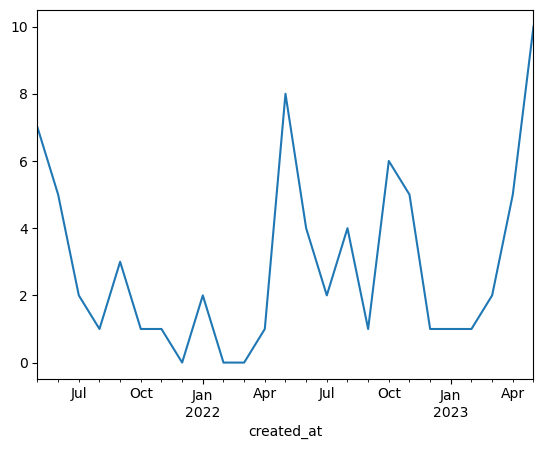

In [8]:
#
# This shows a chart of the count of observations by month
# 
zz = z["uri"].groupby(pandas.Grouper(freq='M')).count()
zz.plot()
